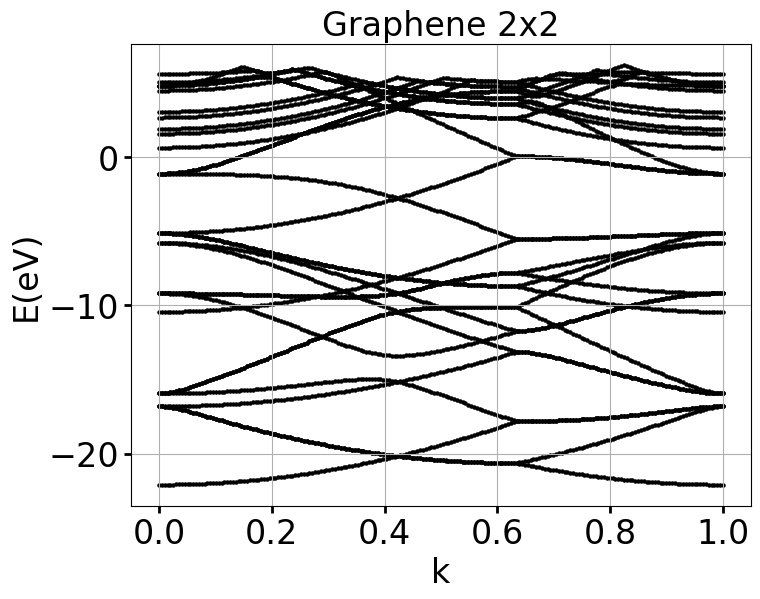

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seekpath
from ase.io import read

# Load band structure data from QE output
data = np.loadtxt("graphene.band.gnu")
unfolded_bandstructure = np.loadtxt("bandstructure_unfolded.txt")
k_values = unfolded_bandstructure[:, 1]   # second column: cumulative k-distance
energies = unfolded_bandstructure[:, 2]   # third column: energy in eV
weights  = unfolded_bandstructure[:, 3]   # fourth column: spectral weight
k_values = k_values/np.max(k_values)


# Extract k-points and energy values
k_values22 = data[:, 0]  # First column: k-points
energies22 = data[:, 1:]  # Remaining columns: Energy levels
k_values22 = k_values22/np.max(k_values22)

# Plot the bands
plt.figure(figsize=(8,6))

plt.scatter(k_values22, energies22[:, 0], color='black', s=5)
#plt.axvline(x = 0.5, color = 'b', label = 'axvline - full height')


#plt.scatter(k_values, energies, color= 'blue', s=1)



plt.xlabel("k")
plt.ylabel("E(eV)")
plt.title("Graphene 2x2")
#plt.grid(True)
#plt.savefig("graphene_band_2x2.png", dpi=300)

plt.show()

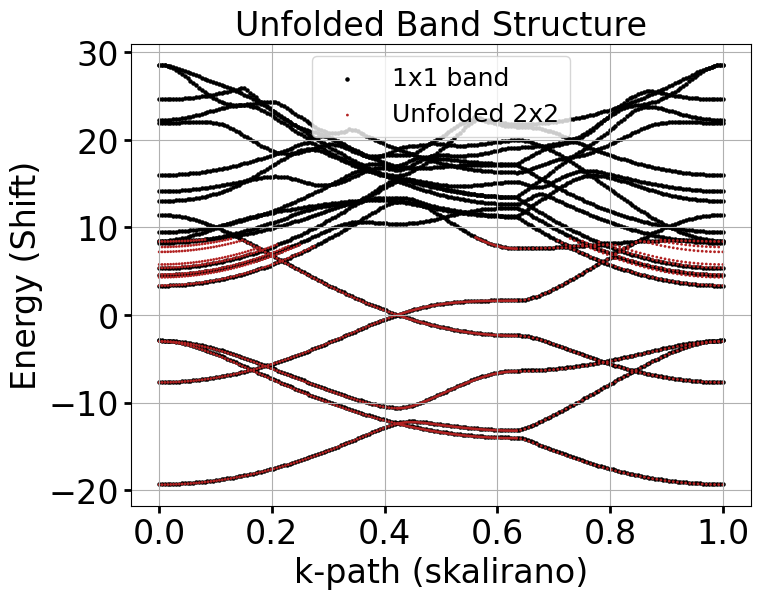

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load unfolded band structure data
# Assumes format: [band_index, k-distance, energy, weight]
unfolded_bandstructure = np.loadtxt("bandstructure_unfolded.txt")

data = np.loadtxt(r"C:\Users\Josip\Desktop\Praska\graphene\bands_1x1/graphene.band.gnu")
E_F1x1 = -1.4374
E_Funf = -2.6975 ## This si original 2x2 fermi energy
# Extract values
k_values = unfolded_bandstructure[:, 1]   # second column: cumulative k-distance
energies = unfolded_bandstructure[:, 2]     # third column: energy in eV
weights  = unfolded_bandstructure[:, 3]     # fourth column: spectral weight

# Scale using the maximum absolute value for symmetric scaling
energies_shifted = (energies-E_Funf) 
k_values = k_values / np.max(k_values)

# Extract k-points and energy values for 1x1 calculation
k_values11 = data[:, 0]  # First column: k-points
energies11 = data[:, 1:]  # Remaining columns: Energy levels

# Apply symmetric scaling to energies11 as well
energies11 = (energies11-E_F1x1) 
k_values11 = k_values11 / np.max(k_values11)


weight_threshold = 0.2 
mask = weights > weight_threshold 
k_values_unfolded = k_values[mask] 
energies_unfolded = energies_shifted[mask] 
weights_unfolded = weights[mask] # you can use these for marker sizes or colormaps

# Plot the bands
plt.figure(figsize=(8,6))

# Plot unfolded band structure points

# Plot first band (or any band as desired) from the 1x1 calculation 
# (adjust the index if necessary)
plt.scatter(k_values11, energies11[:, 0], s=5, color='black', label="1x1 band")

plt.scatter(k_values_unfolded, energies_unfolded, color='firebrick', s=1, label="Unfolded 2x2", linestyle='dashed')


plt.xlabel("k-path (skalirano)")
plt.ylabel("Energy (Shift)")
plt.title("Unfolded Band Structure")
plt.legend()
#plt.grid(True)
#plt.savefig("unfolded_and_1x1.png", dpi=300)
plt.show()